In [10]:
import keras
import numpy as np
import time
import warnings

from eigenpro import kernels
from eigenpro import mnist
from eigenpro import ciphar
from eigenpro import synthetic
from eigenpro import utils
from eigenpro import training

In [11]:
### Dataset

dataset_dict = {}

# num_classes = 10
# (x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load()
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['MNIST'] = dataset

# num_classes = 10
# (x_train_full, y_train_full), (x_test_full, y_test_full) = ciphar.load()
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['CIPHAR'] = dataset

num_classes = 2
(x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(1)
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
dataset_dict['Synthetic1'] = dataset

num_classes = 2
(x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(2)
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
dataset_dict['Synthetic2'] = dataset

Generated Synthetic1 dataset.
60000 train samples
10000 test samples
Generated Synthetic2 dataset.
60000 train samples
10000 test samples


In [12]:
### Kernel

kernel_dict = {}

sg = 5
kernel_sgd = lambda x,y: kernels.Gaussian(x, y, sg)
kernel_inv = lambda x,y: training.Gaussian(x, y, sg)
kernel_dict["Gaussian"] = (kernel_sgd, kernel_inv)

sl = 10
kernel_sgd_l = lambda x,y: kernels.Laplace(x, y, sl)
kernel_inv_l = lambda x,y: training.Laplace(x, y, sl)
kernel_dict["Laplace"] = (kernel_sgd_l, kernel_inv_l)



### Size 

size_list = [200, 400, 600, 2000]
# size_list = [2000, 4000, 10000, 20000, 40000, 50000]



### Noise

noise_list = [0, 10]
# noise_list = [0, 1, 10]


### Training

trainers = training.training(dataset_dict, kernel_dict, size_list, noise_list)

with open('output/figure6-' + time.strftime("%Y%m%d-%H%M%S") + '.txt', 'w') as f:
    print(trainers, file=f)

D:Synthetic1 K:Gaussian S:200 N:0
SVD time: 0.15, Eigenvalue ratio: 448.32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 200)               10000     
_________________________________________________________________
trainable (Dense)            (None, 2)                 400       
Total params: 10,400
Trainable params: 400
Non-trainable params: 10,000
_________________________________________________________________

Stochastic Gradient Descent
train error: 0.00%	test error: 0.00% (1 epochs, 0.53 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.0

D:Synthetic1 K:Gaussian S:200 N:10


train error: 4.35%	test error: 4.73% (1 epochs, 0.84 seconds)
train error: 1.60%	test error: 4.74% (6 epochs, 2.12 seconds)
train error: 0.30%	test error: 4.77% (11 epochs, 3.42 seconds)
train error: 0.00%	test error: 4.85% (14 epochs, 4.22 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.0538

D:Synthetic1 K:Laplace S:200 N:0
SVD time: 0.12, Eigenvalue ratio: 327.54
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 200)               10000     
_________________________________________________________________
trainable (Dense)            (None, 2)                 400       
Total params

train error: 0.00%	test error: 0.00% (1 epochs, 0.83 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.0

D:Synthetic1 K:Laplace S:2000 N:10
SVD time: 0.45, Eigenvalue ratio: 2668.81
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 2000)              100000    
_________________________________________________________________
trainable (Dense)            (None, 2)                 4000      
Total params: 104,000
Trainable params: 4,000
Non-trainable params: 100,000
_________________________________________________________________

Stochastic Gradient Descent
train error: 4.35%	test error

train error: 15.83%	test error: 22.16% (1 epochs, 0.58 seconds)
train error: 2.83%	test error: 22.09% (6 epochs, 1.02 seconds)
train error: 0.67%	test error: 22.31% (11 epochs, 1.47 seconds)
train error: 0.17%	test error: 22.84% (16 epochs, 2.15 seconds)
train error: 0.00%	test error: 22.88% (18 epochs, 2.38 seconds)
Zero Train Error

Linear Interpolation
Classification Error = 0.2486

D:Synthetic2 K:Gaussian S:2000 N:0
SVD time: 0.45, Eigenvalue ratio: 2557.63
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 2000)              100000    
_________________________________________________________________
traina

SVD time: 0.18, Eigenvalue ratio: 1118.72
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 51)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 50)                0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 600)               30000     
_________________________________________________________________
trainable (Dense)            (None, 2)                 1200      
Total params: 31,200
Trainable params: 1,200
Non-trainable params: 30,000
_________________________________________________________________

Stochastic Gradient Descent
train error: 13.50%	test error: 20.42% (1 epochs, 0.59 seconds)
train error: 0.17%	test error: 17.39% (6 epochs, 1.12 seconds)
train error: 0.00%	test error: 17.04% (7 epochs, 1.23 seconds)
Zero 

In [13]:
# with open('figure6_ciphar.txt', 'w') as f:
#     print(trainers, file=f)
# trainers = eval(open('figure6.txt', 'r').read())
# trainers

Synthetic1


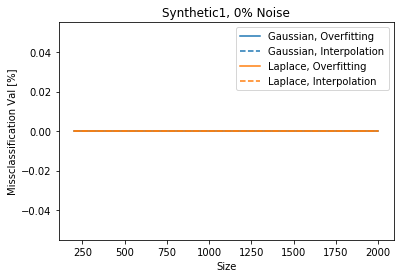

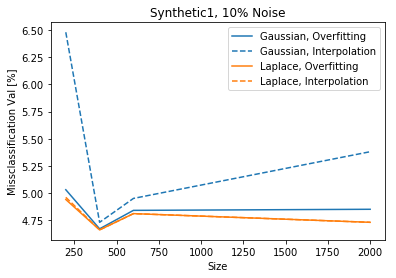

Synthetic2


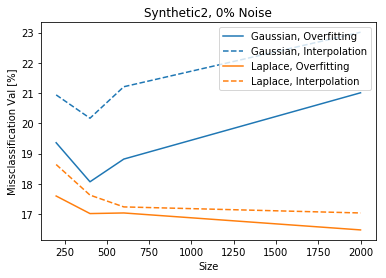

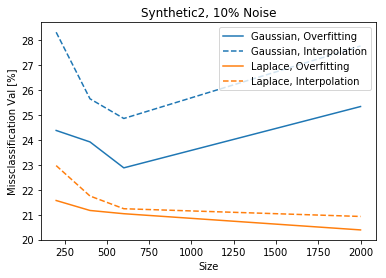

In [14]:
# Size vs Error

import matplotlib.pyplot as plt
ax = plt.gca()

for this_dataset in dataset_dict.keys():
    
    print(this_dataset)
    
    for this_noise in noise_list:

        ax.set_prop_cycle(None)
                
        for this_kernel in kernel_dict.keys():
            
            size = []
            inv = []
            sgd = []

            for name, trainer in trainers.items():  

                if trainer['dataset'] != this_dataset:
                    continue

                if trainer['kernel'] != this_kernel:
                    continue

                if trainer['noise'] != this_noise:
                    continue

                sgd.append(trainer['sgd_ce'] * 100)
                inv.append(trainer['inv_ce'] * 100)
                size.append(trainer['size'])

            
            color = next(ax._get_lines.prop_cycler)['color']
            plt.plot(size, sgd, label=this_kernel + ', Overfitting', color=color) 
            plt.plot(size, inv, '--', label=this_kernel + ', Interpolation', color=color) 

        plt.title(this_dataset + ', ' + str(this_noise) + '% Noise')
        plt.xlabel('Size')
        plt.ylabel('Missclassification Val [%]')
        plt.legend(loc='upper right')
        plt.show()

In [15]:
# del trainers